# EGRMGMT 590.10 Homework 2

## Instructions

*Due at 6:15pm ET on Thursday, February 7*

+ Make sure you have pandas, NumPy, SciPy, Matplotlib, seaborn, and scikit-learn installed before working on the assignment.
+ There are 12 exercises all of which require coding. Your grades are based on the accuracy of the results, not the code execution speed.
    + Exercise 1 to 6, 8, and 10 to 12: each is worth 0.5 points. 
    + Exercise 7: 1 point.
    + Exercise 9: 4 points.
+ Exercises are dependent on prior exercises. Please work on them in the pre-determined order.
+ Submit the .ipynb and .py files to Sakai before 6:15pm ET on Thursday, February 7.
+ Assignments handed in late will lose 1 point every 24-hour window after 6:15pm ET on Thursday, February 7.

## Dataset

**Dataset Information:**

The dataset is from the results of a chemical analysis of wines grown in the same region in Italy but derived from three    different cultivars. The first variable in the dataset indicates the cultivar. The remaining 13 variables are the quantities of 13 constituents found in each of the three types of wines.

0. Cultivar
1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

**Dataset Source:**
https://archive.ics.uci.edu/ml/datasets/wine

## Exercises

**Exercise Overview**

+ We'll conduct cluster analysis using the 13 variables (i.e. excluding 'Cultivar') in the dataset and group wines into natural clusters. 

### Exercise 1 

+ Use the read_csv() function of pandas to read the wine dataset directly from its URL (https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data) to a pandas DataFrame df
+ Display the first five rows of data in df

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
df.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Exercise 2

+ Rename the columns of df using a list ['Cultivar', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityAsh', 'Magnesium', 'TotPhenols', 'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue', 'OD280/OD315Diluted', 'Proline']
+ Display the last five rows of data in df

In [2]:
df.columns=('Cultivar','Alcohol','MalicAcid','Ash','AlcalinityAsh','Magnesium','TotPhenols','Flavanoids','NonflavanoidPhenols','Proanthocyanins','ColorIntensity','Hue','OD280/OD315Diluted','Proline')
df.head(5)

,Cultivar,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,TotPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315Diluted,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Exercise 3

+ Use the seaborn library to create a matrix of scatter plots for all the variables in df, excluding 'Cultivar'
+ Set the diagnal subplots as histograms for univariate distributions

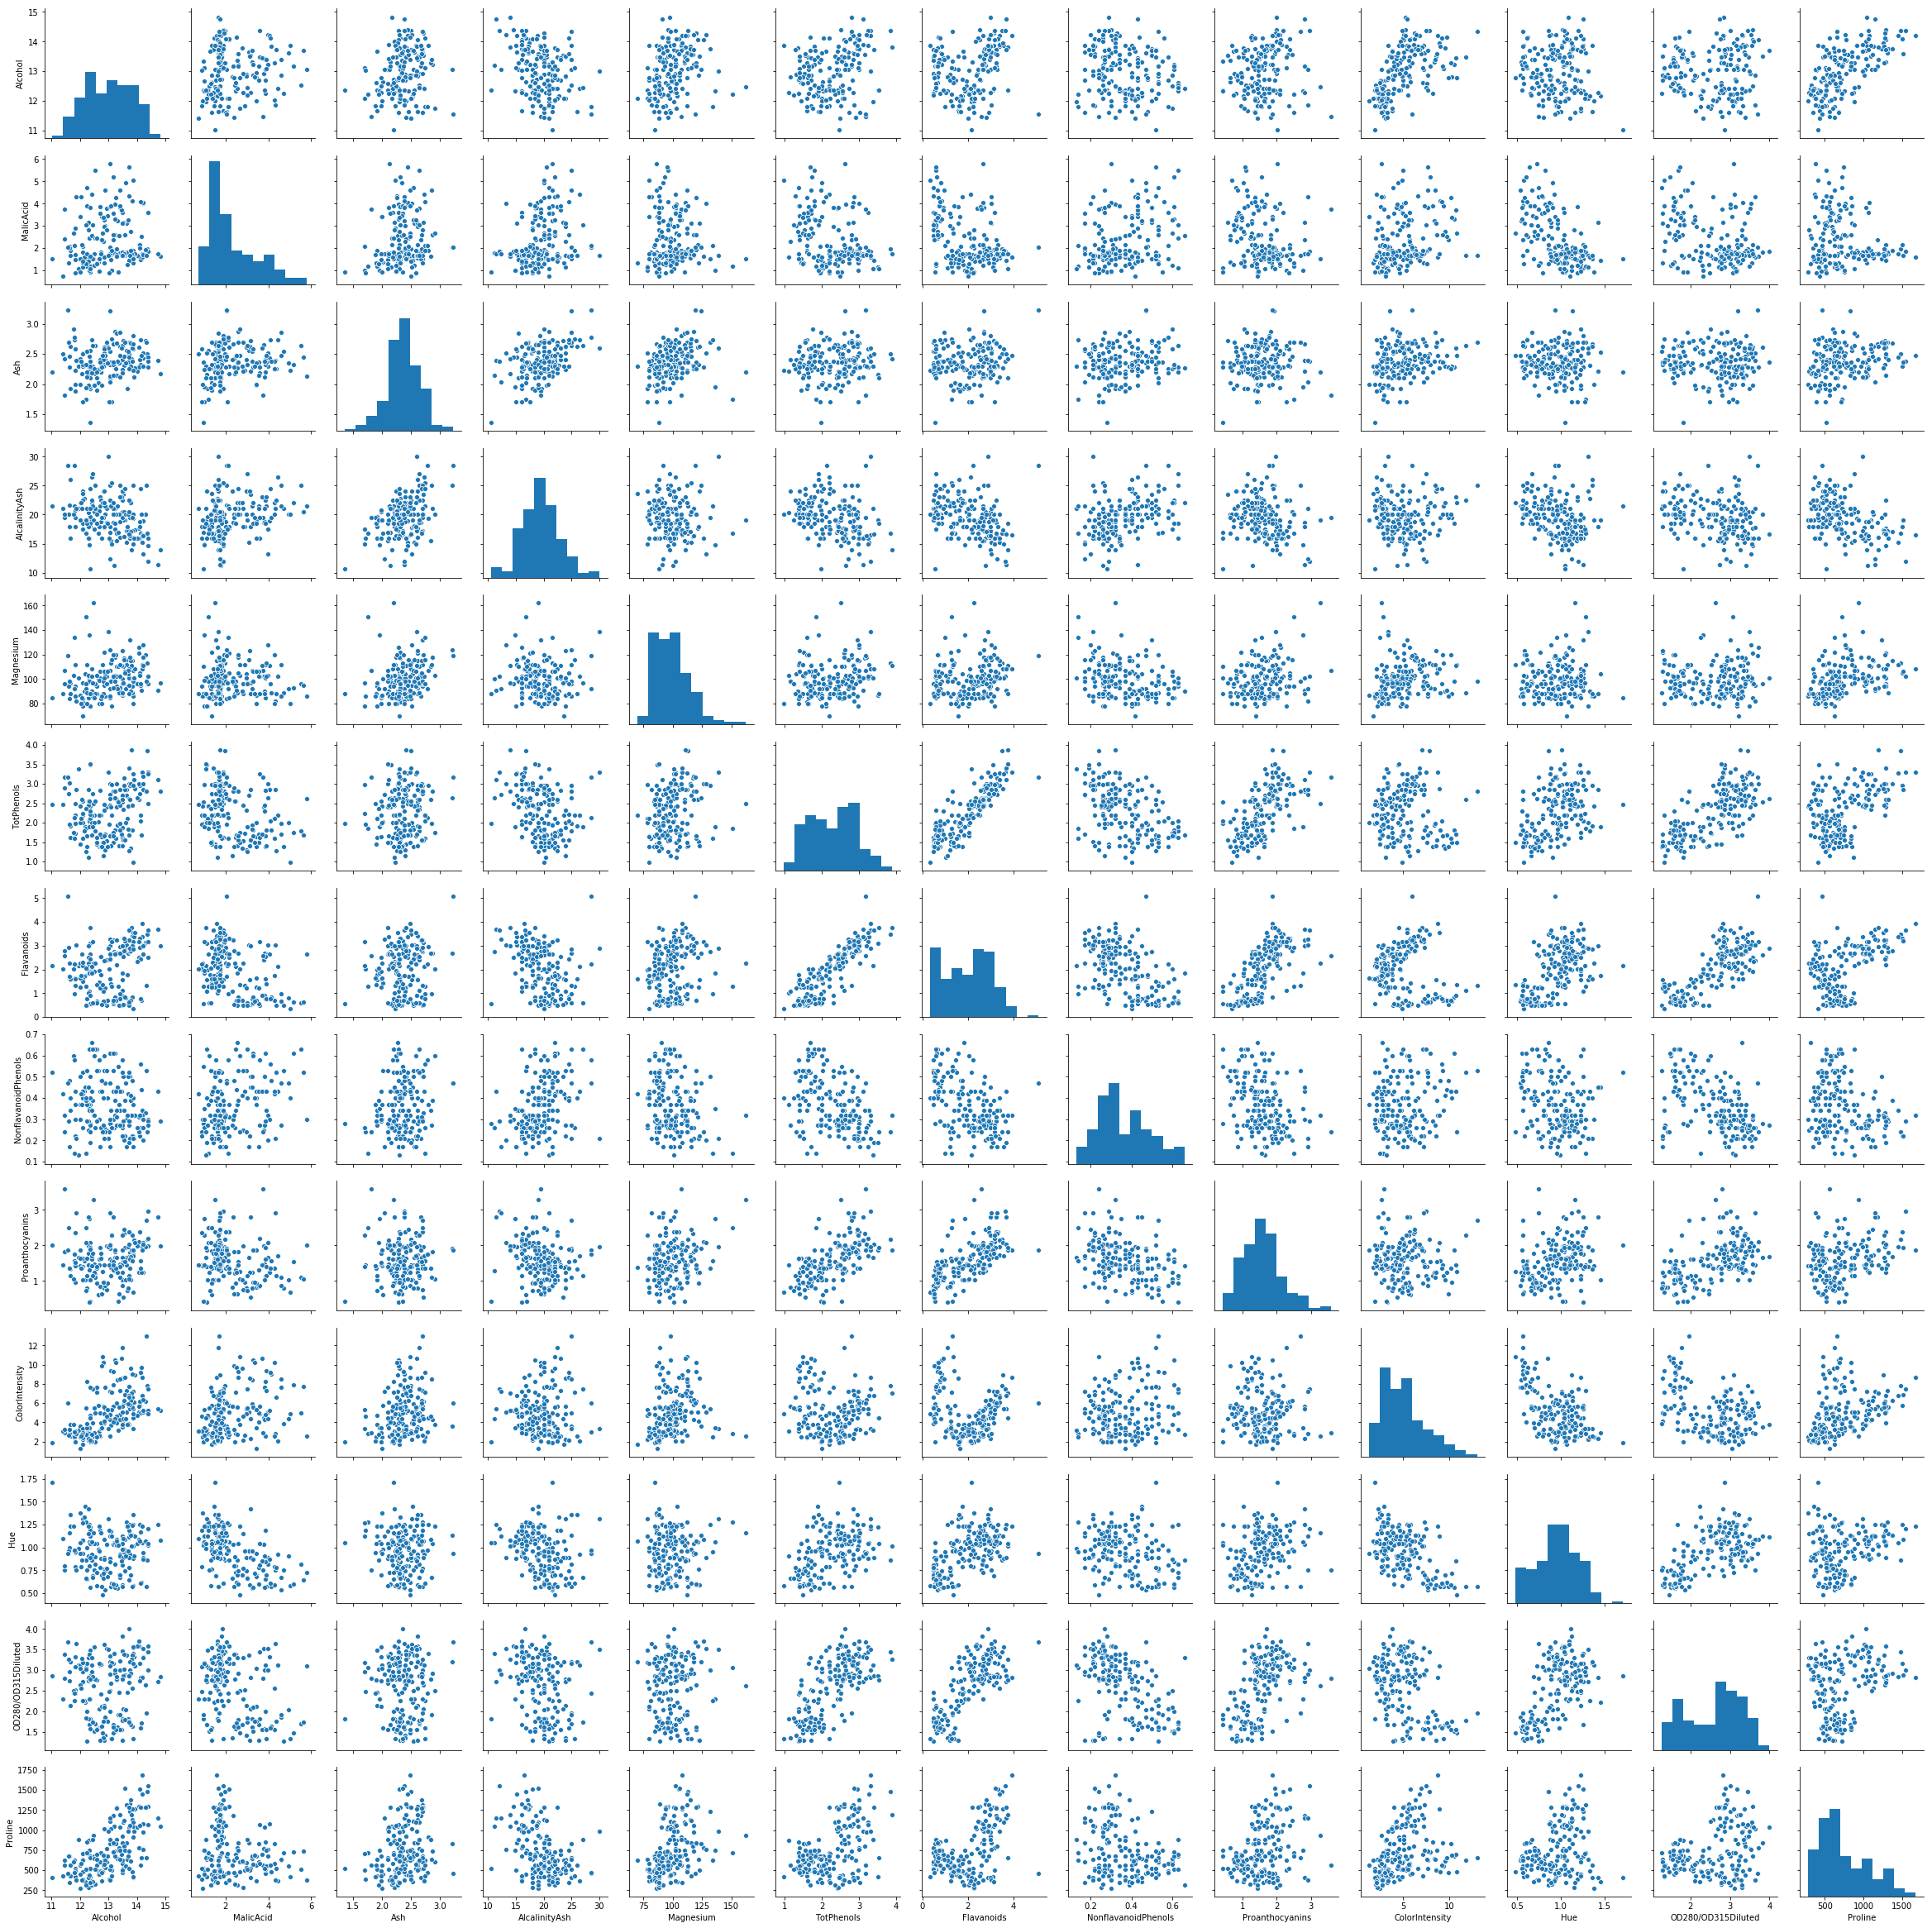

In [4]:
import seaborn as sns
df1=df.copy()
#print(df1)
del(df1['Cultivar'])
sns.pairplot(df1,diag_kind='hist')

### Exercise 4

+ Create a new pandas DataFrame df_standardized which has the standardized values of each column in df, excluding 'Cultivar'. 
+ Column names of df_standardized match corresponding columns in df
+ Display the summary statistics (i.e. count, mean, std, min, 1st/2nd/3rd quartile, and max) by column for df_standardized

In [5]:
"""from sklearn import preprocessing
import pandas as pd

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)"""
from sklearn import preprocessing
df1=df.copy()
del(df1['Cultivar'])
names = df1.columns
scaler = preprocessing.StandardScaler()
df_standardized = scaler.fit_transform(df1)
df_standardized = pd.DataFrame(df_standardized, columns=names)
print(df_standardized)
df_standardized.describe()

      Alcohol  MalicAcid       Ash  AlcalinityAsh  Magnesium  TotPhenols  \
0    0.255824  -0.501624 -0.824485      -2.500110   0.029180    0.572666   
1    0.206229   0.018020  1.107690      -0.275639   0.099932    0.812784   
2    1.706501  -0.349315  0.487935      -0.816726   0.948953    2.493609   
3    0.305420   0.224086  1.836812       0.445811   1.302712    0.812784   
4    1.495719  -0.519543  0.305655      -1.297693   0.878201    1.565153   
5    1.731299  -0.420990  0.305655      -1.478055  -0.253827    0.332548   
6    1.322133  -0.170127  0.888953      -0.576243   1.514967    0.492626   
7    2.276852  -0.627056 -0.715117      -1.658418  -0.183075    0.812784   
8    1.074155  -0.886878 -0.350556      -1.057210  -0.112323    1.100925   
9    1.371729  -0.161168 -0.241187      -0.456001   0.382939    1.052902   
10   1.396527  -0.770406 -0.168275      -0.816726  -0.324579   -0.147688   
11   0.937766  -0.546421  0.159830      -1.057210  -0.749089    0.492626   
12   2.17766

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,TotPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315Diluted,Proline
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,-2.609338e-16,4.252719e-16,-4.378168e-16,-6.410440e-16,-1.028681e-16,-1.279579e-16,1.505387e-16,-5.595022e-16,5.645202e-17,1.568112e-16,6.310081e-16,6.335171e-16,2.389802e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00


### Exercise 5

+ Use sklearn's KMeans to conduct k-means clustering with k = 3 for df_standardized using randomly chosen initial centroids
+ Assign cluster membership to each instance in df_standardized. Save the cluster membership labels of all the instances to a ndarray y_pred1

In [6]:
import sklearn
from sklearn.cluster import KMeans


clustering = KMeans(n_clusters=3)
clustering.fit(df_standardized)
y_pred1=np.array(clustering.predict(df_standardized))
y_pred1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

### Exercise 6

Calculate the average silhouette scores across instances within each cluster created in Excercise 5

In [7]:
a=sklearn.metrics.silhouette_samples(X=df_standardized,labels=y_pred1)
a

array([ 0.24998711,  0.37559463,  0.45965479,  0.2198365 ,  0.49643499,
        0.43574032,  0.42286812,  0.38683857,  0.42612964,  0.45646903,
        0.34839697,  0.39862061,  0.3379094 ,  0.4131376 ,  0.44091457,
        0.4521618 ,  0.41101444,  0.44740753,  0.37377082,  0.38870638,
        0.16768019,  0.35928813,  0.19392495,  0.21594101,  0.13340597,
        0.36608212,  0.20723641,  0.35969127,  0.35686155,  0.37236767,
        0.45316302,  0.27787699,  0.32781096,  0.34361021,  0.32206605,
        0.28927579,  0.22988748,  0.12871325,  0.34069387,  0.37884454,
        0.13519529,  0.43862089,  0.10991363,  0.26971284,  0.32976079,
        0.40952869,  0.39611118,  0.42668783,  0.45552856,  0.26668938,
        0.4165643 ,  0.44942294,  0.46465343,  0.40923934,  0.41021026,
        0.45853754,  0.4459944 ,  0.46589864,  0.12842782,  0.03894084,
        0.06286178,  0.130793  ,  0.08128677,  0.23910918,  0.03084327,
        0.01766161,  0.2748218 , -0.01653701, -0.00435664, -0.01

### Exercise 7

Create a silhouette diagram for the k-means clustering completed in Excercise 5

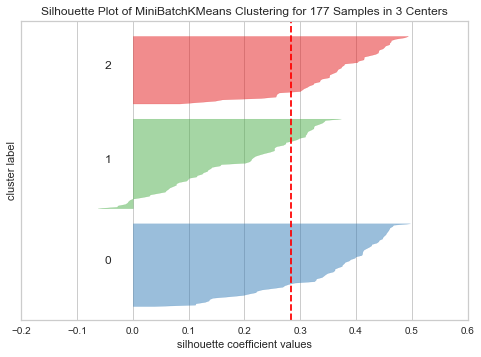

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3)

from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = MiniBatchKMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_standardized)
visualizer.poof()

### Exercise 8

 + Create an "elbow chart" to determine the optimal number of clusters for df_standardized
 + In the "elbow chart", the cluster inertia is the y axis and the number of clusters is the x axis
 + Determine what the optimal number of clusters would be and explain why

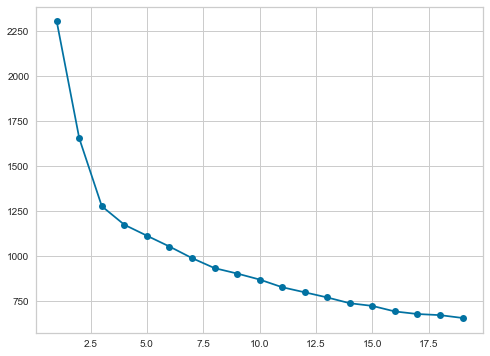

In [9]:
import matplotlib.pyplot as plt
cluster_inertia=[]
cluster_range=range(1,20)

for i in cluster_range:
    clusters= KMeans(i)
    clusters.fit(df_standardized)
    cluster_inertia.append(clusters.inertia_)


clusters_df = pd.DataFrame( { "cluster_range":cluster_range, "cluster_inertia": cluster_inertia } )

"""print(clusters_df[0:10])"""

plt.figure(figsize=(8,6))
plt.plot(clusters_df.cluster_range, clusters_df.cluster_inertia, marker = "o" )

#As we can see that there is a definite inclination on the curve at 3. 

### Exercise 9

+ Complete the Python code in myKMeans_Question.py
+ The myKMeans function needs to call all the other functions defined in myKMeans_Question.py
+ Import the myKMeans function from myKMeans_Question.py
+ Conduct the cluster analysis for df_standardized using myKMeans and show the resulting k cluster centroids
+ Compare the cluster centroids myKMeans returns and sklearn's built-in KMeans returns when using the same k and same random state

In [10]:
import sys
sys.path.append("/Users/paras/Desktop")
from myKMeans_Question import myKMeans

centroid=myKMeans(df_standardized)
j=len(centroid)
print(centroid[j-1])
for i in range(len(centroid)-1): #This is done as the cluster order is different in my code
    print(centroid[i])

clustering = KMeans(n_clusters=3, random_state=42)
clustering.fit(df_standardized)
clustering.cluster_centers_

#As you can see from the output below that myKMeans has the same output has the predefined function KMeans

[-0.9209304634486958, -0.3964549305576139, -0.49189319776176765, 0.16416828681866258, -0.48458658638515717, -0.07134318196993528, 0.026664796449133214, -0.0372008449782734, 0.06527964962644105, -0.8981196228450863, 0.4627165169772189, 0.2831581444458654, -0.7481905734532489]
[0.8357291037634067, -0.3021678535049709, 0.36721187991473914, -0.6082745069057185, 0.5708370969085166, 0.8901986365096277, 0.9829451262511375, -0.5633236420962637, 0.577470275348655, 0.1707125062222866, 0.4766952075431952, 0.7775329246163473, 1.1328498181629538]
[0.17413734891367305, 0.86670214804016, 0.1877084937199166, 0.518309927020309, -0.06515558424282979, -0.9738198039027747, -1.2096640092257451, 0.7211920998325443, -0.7738992945487575, 0.9404767177523757, -1.1599015934049808, -1.290878191972124, -0.4014010124211567]


array([[-0.92093046, -0.39645493, -0.4918932 ,  0.16416829, -0.48458659,
        -0.07134318,  0.0266648 , -0.03720084,  0.06527965, -0.89811962,
         0.46271652,  0.28315814, -0.74819057],
       [ 0.8357291 , -0.30216785,  0.36721188, -0.60827451,  0.5708371 ,
         0.89019864,  0.98294513, -0.56332364,  0.57747028,  0.17071251,
         0.47669521,  0.77753292,  1.13284982],
       [ 0.17413735,  0.86670215,  0.18770849,  0.51830993, -0.06515558,
        -0.9738198 , -1.20966401,  0.7211921 , -0.77389929,  0.94047672,
        -1.15990159, -1.29087819, -0.40140101]])

### Exercise 10

+ Conduct another k-means cluster analysis on the un-standardized data df, excluding 'Cultivar', with k = 3 using randomly chosen initial centroids
+ Assign cluster membership to each instance in the un-standardized dataset. Save the cluster membership labels of all the instances to a ndarray y_pred2
+ Create a crosstab to compare the resulting clustering membership against the original label 'Cultivar' in df
+ Create another crosstab to compare the clustering membership of Exercise 5 against the original label 'Cultivar' in df

In [12]:
a=KMeans(n_clusters=3)
a.fit(df1)
y_pred2=np.array(clustering.predict(df1))
pd.crosstab(df.Cultivar, y_pred2)
#See below for Exercise 5

col_0,1
Cultivar,
1,58
2,71
3,48


In [15]:
pd.crosstab(df.Cultivar,y_pred1) #Exercise 5

col_0,0,1,2
Cultivar,,,
1,0,0,58
2,65,3,3
3,0,48,0


### Exercise 11

+ Use sklearn's AgglomerativeClustering to conduct hierarchical clustering for df_standardized and identify three clusters
+ Assign cluster membership to each instance in the dataset. Save the cluster membership labels of all instances to a ndarray y_pred3

In [44]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(df_standardized)
y_pred3=np.array(clustering.labels_)
y_pred3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2,
       0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

### Exercise 12

Leverage the linkage and dendrogram functions of Scipy to create a dendrogram for the hierarchical clustering of df_standardized 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [85.0, 85.0, 95.0, 95.0],
  [165.0, 165.0, 175.0, 175.0],
  [275.0, 275.0, 285.0, 285.0],
  [335.0, 335.0, 345.0, 345.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [475.0, 475.0, 485.0, 485.0],
  [515.0, 515.0, 525.0, 525.0],
  [585.0, 585.0, 595.0, 595.0],
  [645.0, 645.0, 655.0, 655.0],
  [635.0, 635.0, 650.0, 650.0],
  [675.0, 675.0, 685.0, 685.0],
  [665.0, 665.0, 680.0, 680.0],
  [705.0, 705.0, 715.0, 715.0],
  [695.0, 695.0, 710.0, 710.0],
  [745.0, 745.0, 755.0, 755.0],
  [735.0, 735.0, 750.0, 750.0],
  [725.0, 725.0, 742.5, 742.5],
  [775.0, 775.0, 785.0, 785.0],
  [765.0, 765.0, 780.0, 780.0],
  [733.75, 733.75, 772.5, 772.5],
  [702.5, 702.5, 753.125, 753.125],
  [805.0, 805.0, 815.0, 815.0],
  [825.0, 825.0, 835.0, 835.0],
  [810.0, 810.0, 830.0, 830.0],
  [795.0, 795.0, 820.0, 820.0],
  [727.8125, 727.8125, 807.5, 807.5],
  [672.5, 672.5, 767.65625, 767.65625],
  [855.0, 855.0, 865.0, 

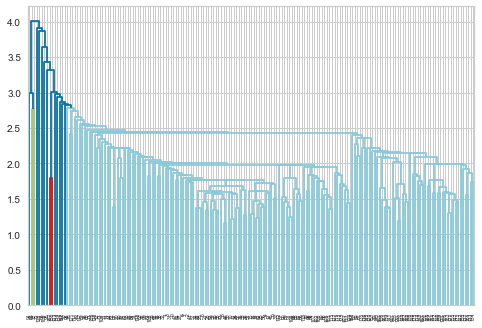

In [45]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(df_standardized))